In [1]:
using VariableHeightInvertedPendulum

In [2]:
# Parameters
g = 9.8
zf = 1.;

In [3]:
# (Part of) initial state
x0 = -0.3
z0 = 1.
zd0 = 0.;

In [4]:
do_export = true;
const sim_visualize = sim_figure;
# const sim_visualize = sim_movie;

In [5]:
# Orbital energy controller.
model = CubicControlledVariableHeightInvertedPendulum("cubic", g, zf, false);

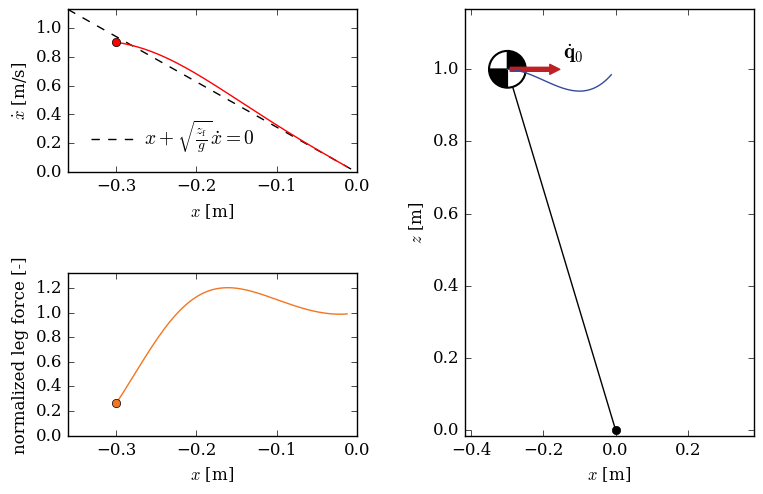

In [6]:
sim_visualize(Scenario("slow", model, [x0; z0; 0.9; zd0]); do_export = do_export)

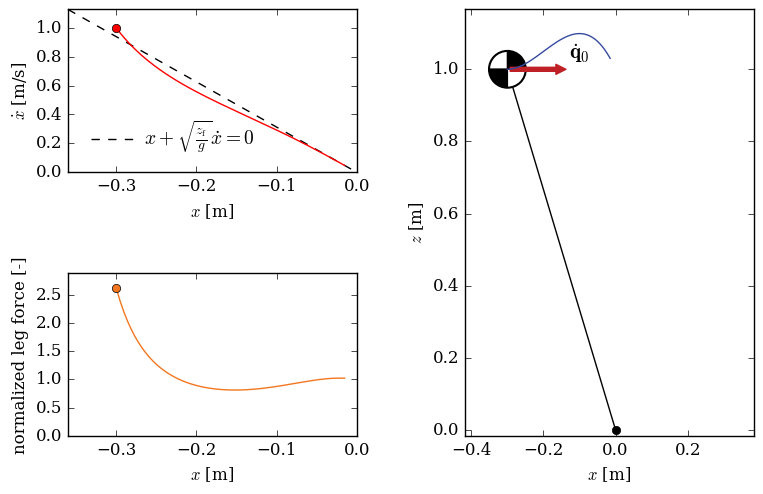

In [7]:
sim_visualize(Scenario("fast", model, [x0; z0; 1.0; zd0]); do_export = do_export)

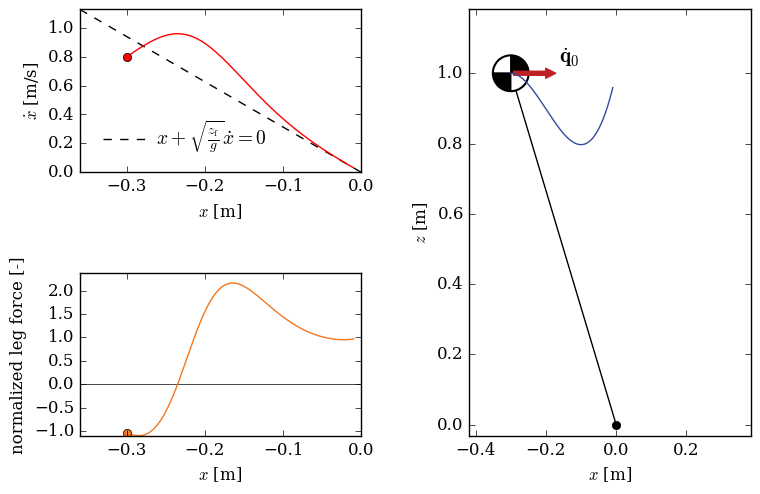

In [8]:
sim_visualize(Scenario("too_slow", model, [x0; z0; 0.8; zd0]); do_export = do_export)

In [5]:
# Clipped controller.
model = CubicControlledVariableHeightInvertedPendulum("clipped_cubic", g, zf, true);

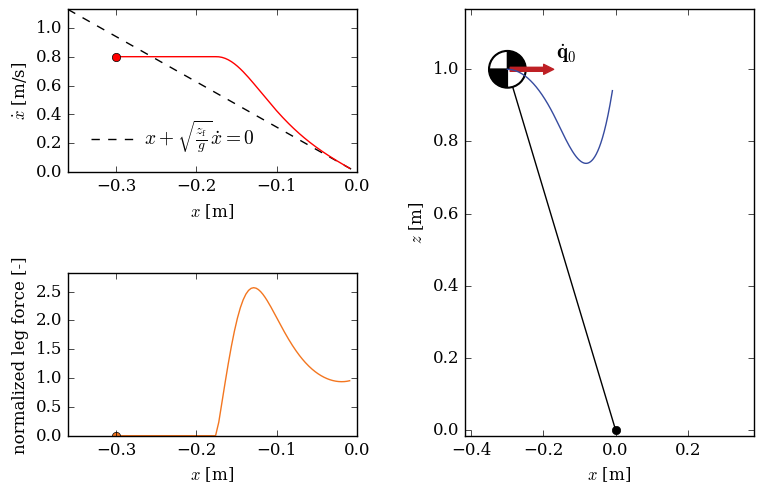

In [10]:
sim_visualize(Scenario("too_slow", model, [x0; z0; 0.8; zd0]); do_export = do_export)

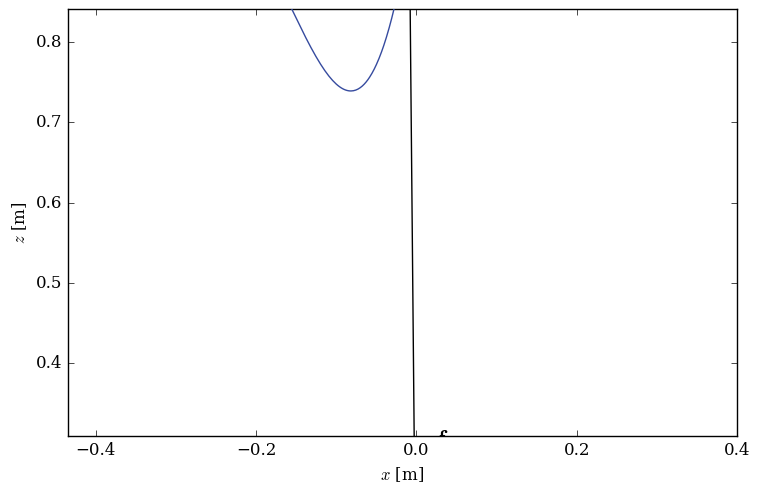

In [6]:
sim_figure(Scenario("ppt_slide", model, [x0; z0; 0.8; zd0]); do_export = do_export, snapshots = 5, model_only = true, show_leg_force = true)

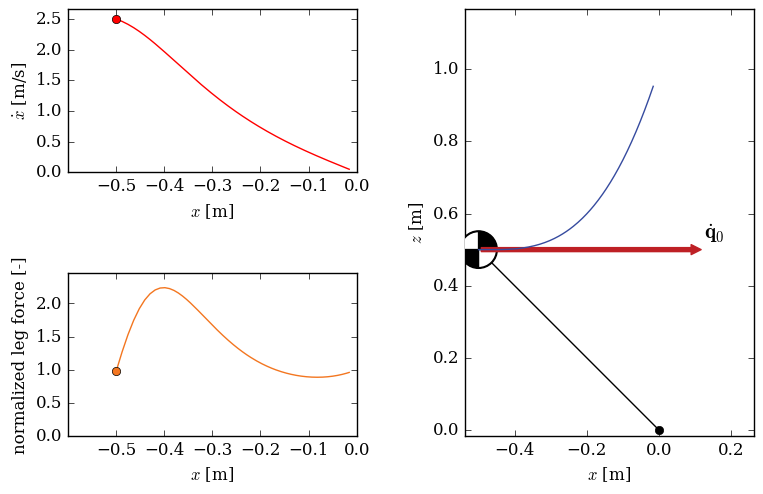

In [11]:
sim_visualize(Scenario("step_up", model, [-0.5; 0.5; 2.5; 0.]); show_icp_line = false, do_export = do_export)

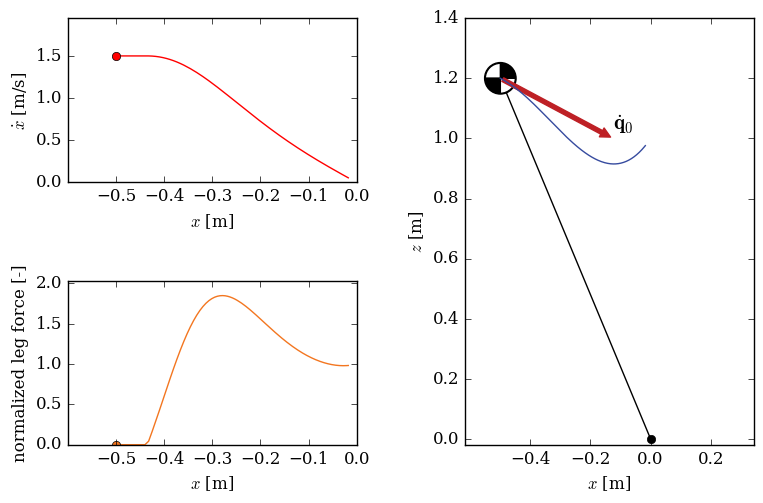

In [12]:
sim_visualize(Scenario("slow_step_down", model, [-0.5; 1.2; 1.5; -0.8]); show_icp_line = false, do_export = do_export)

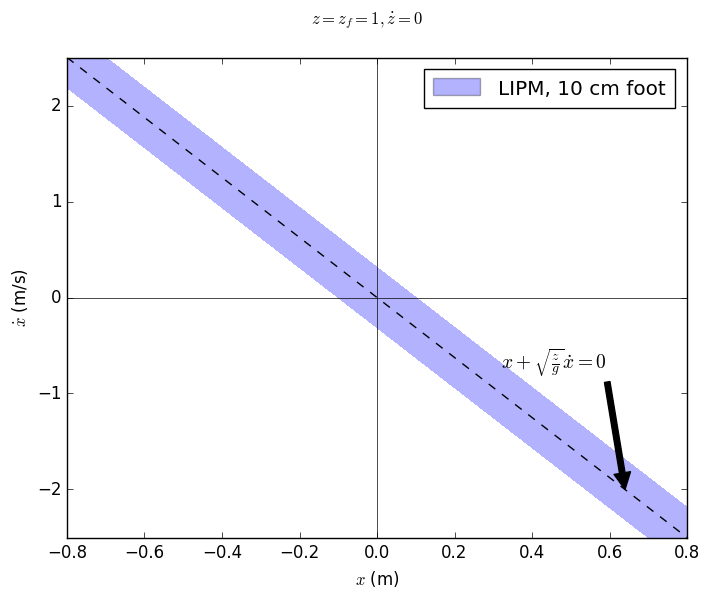

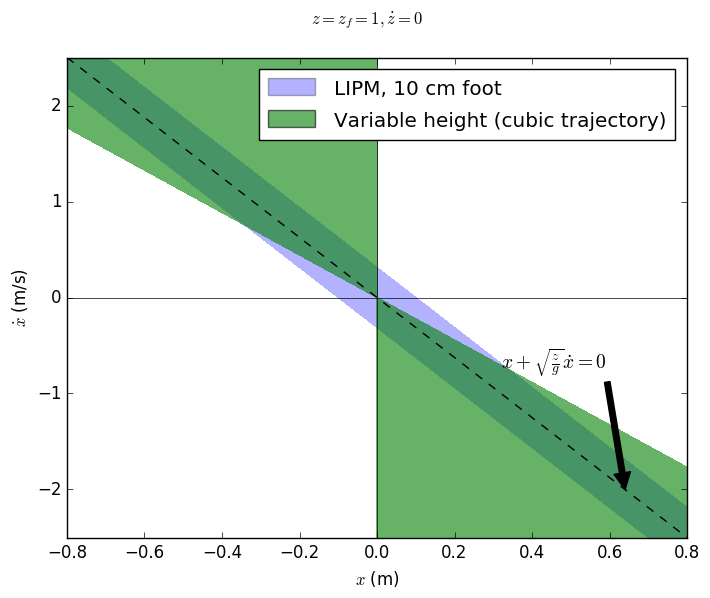

In [13]:
# TODO: move somewhere else
using LaTeXStrings
using PyPlot

lipm = LIPM("lipm", g, zf)
foot_size = 0.1
for show_variable_height in [false, true]
    font_size = 14
    plt[:rc]("font", size = font_size)
    lipm_color = "blue"
    lipm_alpha = 0.3
    variable_height_color = "g"
    variable_height_alpha = 0.6


    xrange = [-0.8, 0.8]
    xdrange = lipm.ω * xrange;
    num_points = 1000
    xlinspace = linspace(xrange..., num_points)
    xdlinspace = linspace(xdrange..., num_points)
    x_grid = [i::Float64 for i in xlinspace, j in xdlinspace]
    xd_grid = [j::Float64 for i in xlinspace, j in xdlinspace]
    xic_grid = abs(x_grid + 1 / lipm.ω * xd_grid)

    ion()
    fig = figure()
    xlim(xrange)
    ylim(xdrange)

    # axis lines
    axhline(linewidth = 0.5, color = "black")
    axvline(linewidth = 0.5, color = "black")

    # eigenvectors
    ω = lipm.ω
    # plot(xrange,  ω * xrange, "k--", linewidth = 1.0, zorder = 1)
    plot(xrange, -ω * xrange, "k--", linewidth = 1.0, zorder = 1)

    # ICP line annotation
    xarrowtip = xrange[2] - 0.1 * diff(xrange)
    arrowtip = [xarrowtip; -ω * xarrowtip]
    offset = [-diff(xrange) / 5; diff(xdrange) / 4]
    annotate(L"x + \sqrt{\frac{z}{g}} \dot{x} = 0", xy = arrowtip, xytext = arrowtip + offset, xycoords="data", arrowprops = Dict("facecolor"=>"black"))


    # axis labels
    xlabel(L"x" * " (m)")
    ylabel(L"\dot x" * " (m/s)")

    lipm_contour = contourf(x_grid, xd_grid, xic_grid, levels = [-Inf, foot_size], colors = lipm_color, alpha = lipm_alpha, zorder = 1)[:collections][1]
    lipm_proxy = plt[:Rectangle]((0,0),1,1, fc = lipm_color, alpha = lipm_alpha)

    if show_variable_height
        opposite_velocity_mask = max(-sign((x_grid .* xd_grid)), 0)
        #valid = VariableHeightInvertedPendulum.is_force_always_nonnegative_condition2(lipm.g, x_grid, zf, xd_grid, 0., zf) .* opposite_velocity_mask
        valid = -(xd_grid ./ x_grid + 1 / sqrt(2) * sqrt(lipm.g / zf)) .* opposite_velocity_mask
        invalidcontour = contourf(x_grid, xd_grid, valid, levels = [0, Inf], colors = variable_height_color, alpha = variable_height_alpha, zorder = 1)
        variable_height_proxy = plt[:Rectangle]((0,0),1,1, fc = variable_height_color, alpha = variable_height_alpha)
    end

    if show_variable_height
        legend([lipm_proxy, variable_height_proxy], ["LIPM, 10 cm foot", "Variable height (cubic trajectory)"])
    else
        legend([lipm_proxy], ["LIPM, 10 cm foot"])
    end

    suptitle(L"z = z_f = 1, \dot{z} = 0")
    savefig("../figures/ss_variable_height_$(show_variable_height).pdf")

    plt[:rcdefaults]()
end